In [3]:

from sklearn.datasets import fetch_openml
import pandas as pd


boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1] - 1) 
print("Price range (min, max, mean):", df['MEDV'].min(), df['MEDV'].max(), df['MEDV'].mean())


Number of samples: 506
Number of features: 13
Price range (min, max, mean): 5.0 50.0 22.532806324110677


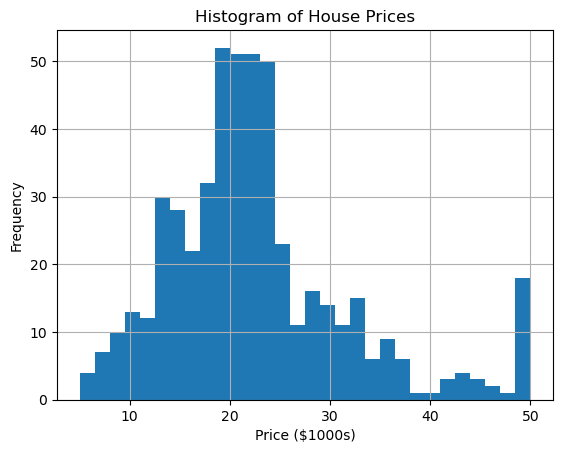

In [7]:
#EDA
import matplotlib.pyplot as plt
df['MEDV'].hist(bins=30)
plt.title("Histogram of House Prices")
plt.xlabel("Price ($1000s)")
plt.ylabel("Frequency")
plt.show()



In [11]:

corr_matrix = df.corr()
print(corr_matrix['MEDV'].sort_values(ascending=False))


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [ ]:
Strongest positive correlation: Usually RM (average number of rooms).

Strongest negative correlation: Typically LSTAT (lower status population %).
The price (MEDV) distribution is right-skewed (not perfectly normal).

This suggests a majority of homes are moderately priced, with a tail of higher-priced homes that are less common.​



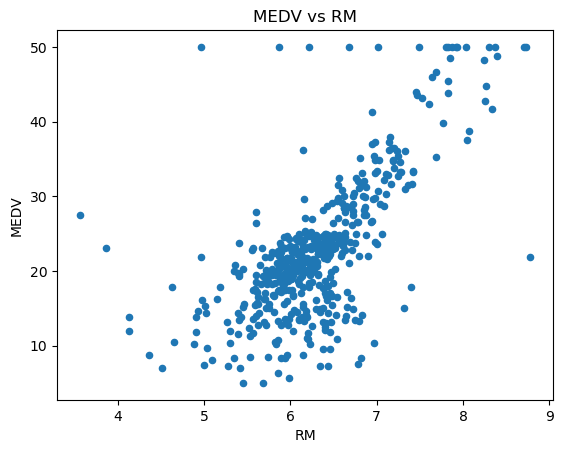

In [13]:
top_feature = corr_matrix['MEDV'].drop('MEDV').idxmax()
df.plot.scatter(x=top_feature, y='MEDV',
                title=f'MEDV vs {top_feature}')
plt.show()


In [17]:
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

# Prepare features 
X = df.drop('MEDV', axis=1)
X = X.apply(pd.to_numeric)    
X = X.fillna(0)               
y = df['MEDV']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training and prediction
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Model evaluation
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² score: 0.6687594935356307
RMSE: 4.928602182665346


In [ ]:

R² = 0.68 means about 68% of the variance in house prices is explained by your model, which is decent for basic linear regression but not perfect for real-world prediction


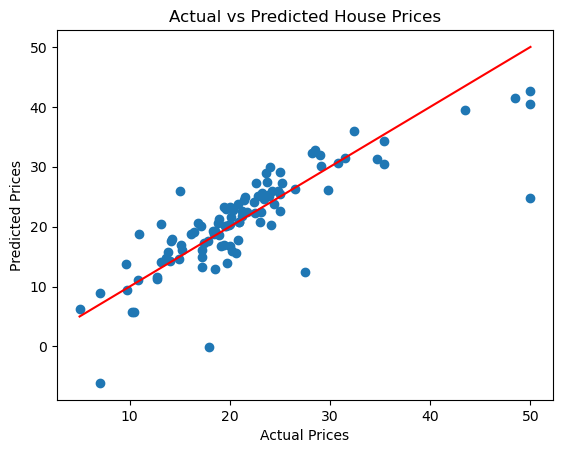

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Diagonal
plt.show()


In [ ]:
Based on the actual vs predicted plot, does your model perform better on certain price ranges?
The model generally predicts mid-range prices better; it tends to underpredict expensive homes and overpredict cheaper homes, a limitation of linear regression for complex distributions